In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ethnicolr

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ethnicolr import census_ln, pred_census_ln, pred_nc_reg_name

In [5]:
path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/relevant_names.csv'


In [7]:
df = pd.read_csv(path)
df = df[['nconst', 'primaryName']]
print(df.shape)
df.head()

(5272, 2)


,nconst,primaryName
0,nm0000002,Lauren Bacall
1,nm0000008,Marlon Brando
2,nm0000084,Gong Li
3,nm0000090,Armin Mueller-Stahl
4,nm0000092,John Cleese


In [8]:
suffixes = ["Sr.", "Jr.", "I", "II", "III", "IV", "V"]

def get_last_name(primary_name):
    last_name = primary_name.split()[-1]
    if last_name in suffixes:
        last_name = primary_name.split()[-2]
    return last_name

In [9]:
df['first_name'] = df.apply(lambda x: x.primaryName.split()[0], axis=1)
df['last_name'] = df.apply(lambda x: get_last_name(x.primaryName), axis=1)

In [10]:
df.head()

,nconst,primaryName,first_name,last_name
0,nm0000002,Lauren Bacall,Lauren,Bacall
1,nm0000008,Marlon Brando,Marlon,Brando
2,nm0000084,Gong Li,Gong,Li
3,nm0000090,Armin Mueller-Stahl,Armin,Mueller-Stahl
4,nm0000092,John Cleese,John,Cleese


In [11]:
odf = pred_nc_reg_name(df, 'last_name', 'first_name')
odf.head()

,nconst,primaryName,first_name,last_name,__name,HL+A,HL+B,HL+I,HL+M,HL+O,HL+W,NL+A,NL+B,NL+I,NL+M,NL+O,NL+W,race
0,nm0000002,Lauren Bacall,Lauren,Bacall,Bacall Lauren,5.295278e-12,5.241979e-08,1.147158e-09,2.287984e-06,0.018420,1.213805e-01,0.003325,0.147800,0.008303,0.003940,0.041653,0.655177,NL+W
1,nm0000008,Marlon Brando,Marlon,Brando,Brando Marlon,1.677530e-10,8.128731e-11,6.717757e-10,3.554835e-04,0.303513,4.879867e-01,0.004365,0.013393,0.005760,0.000009,0.138214,0.046404,HL+W
2,nm0000084,Gong Li,Gong,Li,Li Gong,4.088150e-10,5.892193e-10,7.462152e-10,3.830045e-10,0.000615,7.282334e-07,0.740721,0.001142,0.000156,0.000024,0.256411,0.000930,NL+A
3,nm0000090,Armin Mueller-Stahl,Armin,Mueller-Stahl,Mueller-Stahl Armin,1.279231e-08,4.576425e-10,4.602164e-12,2.438293e-02,0.225645,5.128316e-02,0.166164,0.069155,0.031796,0.000580,0.155234,0.275759,NL+W
4,nm0000092,John Cleese,John,Cleese,Cleese John,1.001518e-06,8.389105e-08,3.857603e-12,5.813751e-02,0.002677,5.439312e-03,0.005067,0.098863,0.740875,0.009808,0.020834,0.058298,NL+I


In [93]:
odf.shape

(5272, 18)

In [94]:
odf.to_csv('predicted_race.csv', index=False)

In [15]:
df['pred_race'] = odf['race'].str.split('+', 1, expand=True, )[1]

In [16]:
df['pred_race'].value_counts()

W    2035
O     942
B     799
M     575
A     561
I     360
Name: pred_race, dtype: int64

https://github.com/appeler/nc_race_ethnicity

### Race codes
- A: ASIAN
- B: BLACK or AFRICAN AMERICAN
- I: AMERICAN INDIAN or ALASKA NATIVE
- M: TWO or MORE RACES
- O: OTHER
- P: NATIVE HAWAIIAN or PACIFIC ISLANDER
- U: UNDESIGNATED
- W: WHITE

In [17]:
race_code = {
    'A': 'Asian',
    'B': 'Black/African American',
    'I': 'American Indian/Alaska Native',
    'M': '2+ races',
    'O': 'Other',
    'P': 'Native Hawaiian/Pacific Islander',
    'U': 'Undesignated',
    'W': 'White'
}

In [18]:
df['pred_race_txt'] = df.apply(lambda x: race_code[x.pred_race], axis=1)
df.head()

,nconst,primaryName,first_name,last_name,__name,pred_race,pred_race_txt
0,nm0000002,Lauren Bacall,Lauren,Bacall,Bacall Lauren,W,White
1,nm0000008,Marlon Brando,Marlon,Brando,Brando Marlon,W,White
2,nm0000084,Gong Li,Gong,Li,Li Gong,A,Asian
3,nm0000090,Armin Mueller-Stahl,Armin,Mueller-Stahl,Mueller-Stahl Armin,W,White
4,nm0000092,John Cleese,John,Cleese,Cleese John,I,American Indian/Alaska Native


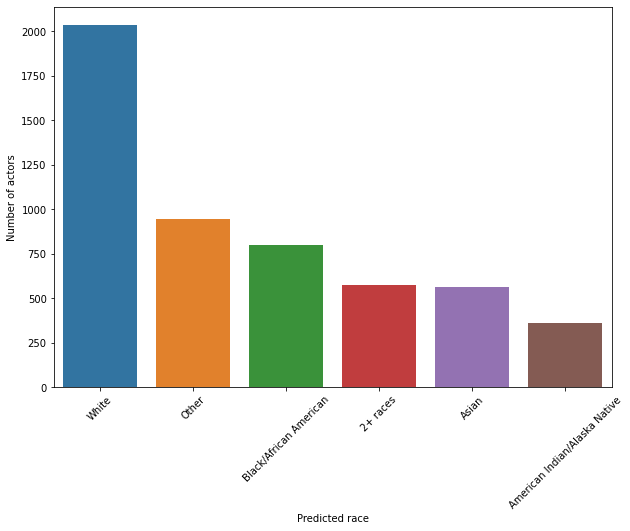

In [23]:
# Top 20 languages

plt.figure(figsize=(10, 7))

f = sns.countplot(data=df, x="pred_race_txt", order=df.pred_race_txt.value_counts().index)
# f.set_xticklabels(top_lang_names)

plt.tick_params(axis='x', rotation=45)
plt.xlabel('Predicted race')
plt.ylabel('Number of actors')

plt.show()

In [24]:
path2 = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/actors_metadata.csv'
metadata = pd.read_csv(path2)
# metadata = metadata[['ACTOR_NAME']]
print(metadata.shape)
metadata.head()

(4058, 17)


,X,X_1,CHARACTER_ID,SCRIPT_ID,CHARACTER_NAME,ACTOR_NAME,PARTIAL_MATCH,GENDER,MISGENDER,CHARACTER_RACE,ACTOR_RACE,PART_WHITE,AGE,EXTRACTED_WORDS,POLYGRAPH_WORDS,IMDB_ACTOR_HOMEPAGE,GOOGLE_IMAGE_SEARCH
0,1,14,960,863,ronnie,Aaron Yoo,n,m,NaN,a,a,n,28.0,613,926,http://www.imdb.com/name/nm1683094/?ref_=ttfc_...,https://www.google.com/search?q=Aaron+Yoo+acto...
1,2,81,15713,5298,dulcie kawamura,Akemi Nishino,n,f,x,a,a,n,NaN,292,365,http://www.imdb.com/name/nm0632781/?ref_=ttfc_...,https://www.google.com/search?q=Akemi+Nishino+...
2,3,82,2929,1343,fujiko imada,Ako,n,f,NaN,a,a,n,NaN,192,198,http://www.imdb.com/name/nm0015488/?ref_=ttfc_...,https://www.google.com/search?q=Ako+actress&so...
3,4,867,5732,2087,eric draven,Brandon Lee,n,m,NaN,w,a,y,32.0,854,2530,http://www.imdb.com/name/nm0000488/?ref_=ttfc_...,https://www.google.com/search?q=Brandon+Lee+ac...
4,5,2032,13887,4589,jim trudell,Don Wilson,y,m,NaN,a,a,y,41.0,548,909,http://www.imdb.com/name/nm0933310/?ref_=ttfc_...,https://www.google.com/search?q=Don+Wilson+act...


In [33]:
tmp = metadata.IMDB_ACTOR_HOMEPAGE.to_list()[0]
tmp

'http://www.imdb.com/name/nm1683094/?ref_=ttfc_fc_cl_t5'

In [37]:
tmp.split('/')[-2]

'nm1683094'

In [38]:
def get_IMDB_ID(link):
  id = link.split('/')[-2]
  if not id.startswith('nm'):
    return None
  return id

In [40]:
metadata['nconst'] = metadata.apply(lambda x: get_IMDB_ID(x.IMDB_ACTOR_HOMEPAGE), axis=1)
metadata.head()

,X,X_1,CHARACTER_ID,SCRIPT_ID,CHARACTER_NAME,ACTOR_NAME,PARTIAL_MATCH,GENDER,MISGENDER,CHARACTER_RACE,ACTOR_RACE,PART_WHITE,AGE,EXTRACTED_WORDS,POLYGRAPH_WORDS,IMDB_ACTOR_HOMEPAGE,GOOGLE_IMAGE_SEARCH,nconst
0,1,14,960,863,ronnie,Aaron Yoo,n,m,NaN,a,a,n,28.0,613,926,http://www.imdb.com/name/nm1683094/?ref_=ttfc_...,https://www.google.com/search?q=Aaron+Yoo+acto...,nm1683094
1,2,81,15713,5298,dulcie kawamura,Akemi Nishino,n,f,x,a,a,n,NaN,292,365,http://www.imdb.com/name/nm0632781/?ref_=ttfc_...,https://www.google.com/search?q=Akemi+Nishino+...,nm0632781
2,3,82,2929,1343,fujiko imada,Ako,n,f,NaN,a,a,n,NaN,192,198,http://www.imdb.com/name/nm0015488/?ref_=ttfc_...,https://www.google.com/search?q=Ako+actress&so...,nm0015488
3,4,867,5732,2087,eric draven,Brandon Lee,n,m,NaN,w,a,y,32.0,854,2530,http://www.imdb.com/name/nm0000488/?ref_=ttfc_...,https://www.google.com/search?q=Brandon+Lee+ac...,nm0000488
4,5,2032,13887,4589,jim trudell,Don Wilson,y,m,NaN,a,a,y,41.0,548,909,http://www.imdb.com/name/nm0933310/?ref_=ttfc_...,https://www.google.com/search?q=Don+Wilson+act...,nm0933310


In [41]:
overlap = list(set(df.nconst.to_list()) & set (metadata.nconst.to_list()))

In [42]:
len(overlap)

1267

In [43]:
metadata.nconst.unique().shape

(2539,)

In [44]:
df[df.nconst.isin(overlap)]

,nconst,primaryName,first_name,last_name,__name,pred_race,pred_race_txt
0,nm0000002,Lauren Bacall,Lauren,Bacall,Bacall Lauren,W,White
1,nm0000008,Marlon Brando,Marlon,Brando,Brando Marlon,W,White
3,nm0000090,Armin Mueller-Stahl,Armin,Mueller-Stahl,Mueller-Stahl Armin,W,White
5,nm0000093,Brad Pitt,Brad,Pitt,Pitt Brad,W,White
6,nm0000095,Woody Allen,Woody,Allen,Allen Woody,I,American Indian/Alaska Native
...,...,...,...,...,...,...,...
4857,nm4442319,Kara Hayward,Kara,Hayward,Hayward Kara,W,White
4889,nm4583512,Katie Chang,Katie,Chang,Chang Katie,A,Asian
4926,nm4832920,Quvenzhané Wallis,Quvenzhané,Wallis,Wallis Quvenzhané,O,Other
4927,nm4833412,Dwight Henry,Dwight,Henry,Henry Dwight,B,Black/African American


In [45]:
metadata[metadata.nconst.isin(overlap)]

,X,X_1,CHARACTER_ID,SCRIPT_ID,CHARACTER_NAME,ACTOR_NAME,PARTIAL_MATCH,GENDER,MISGENDER,CHARACTER_RACE,ACTOR_RACE,PART_WHITE,AGE,EXTRACTED_WORDS,POLYGRAPH_WORDS,IMDB_ACTOR_HOMEPAGE,GOOGLE_IMAGE_SEARCH,nconst
0,1,14,960,863,ronnie,Aaron Yoo,n,m,NaN,a,a,n,28.0,613,926,http://www.imdb.com/name/nm1683094/?ref_=ttfc_...,https://www.google.com/search?q=Aaron+Yoo+acto...,nm1683094
10,11,3222,10056,3250,lee,Jackie Chan,n,m,NaN,a,a,n,47.0,1101,3524,http://www.imdb.com/name/nm0000329/?ref_=ttfc_...,https://www.google.com/search?q=Jackie+Chan+ac...,nm0000329
11,12,3221,10047,3248,lee,Jackie Chan,n,m,NaN,a,a,n,44.0,533,1128,http://www.imdb.com/name/nm0000329/?ref_=ttfc_...,https://www.google.com/search?q=Jackie+Chan+ac...,nm0000329
12,13,3289,1666,1030,miguel,James Duval,n,m,NaN,l,a,y,24.0,195,263,http://www.imdb.com/name/nm0001166/?ref_=ttfc_...,https://www.google.com/search?q=James+Duval+ac...,nm0001166
14,15,3922,1427,988,harold lee,John Cho,n,m,NaN,a,a,n,32.0,1881,4102,http://www.imdb.com/name/nm0158626/?ref_=ttfc_...,https://www.google.com/search?q=John+Cho+actor...,nm0158626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,4508,8262,8746,2852,peter sullivan,Zachary Quinto,n,m,NaN,w,NaN,NaN,34.0,890,1723,http://www.imdb.com/name/nm0704270/?ref_=ttfc_...,https://www.google.com/search?q=Zachary+Quinto...,nm0704270
4054,4512,8283,9139,2964,nessa watkins,Zooey Deschanel,n,f,NaN,w,NaN,NaN,19.0,550,1860,http://www.imdb.com/name/nm0221046/?ref_=ttfc_...,https://www.google.com/search?q=Zooey+Deschane...,nm0221046
4055,4513,8282,7037,2426,cheryl,Zooey Deschanel,n,f,NaN,w,NaN,NaN,22.0,383,1256,http://www.imdb.com/name/nm0221046/?ref_=ttfc_...,https://www.google.com/search?q=Zooey+Deschane...,nm0221046
4056,4514,8281,7442,2547,trillian,Zooey Deschanel,n,f,NaN,w,NaN,NaN,25.0,384,1254,http://www.imdb.com/name/nm0221046/?ref_=ttfc_...,https://www.google.com/search?q=Zooey+Deschane...,nm0221046


In [46]:
metadata = metadata[['nconst', 'ACTOR_NAME', 'ACTOR_RACE', 'PART_WHITE']]

In [51]:
metadata

,nconst,ACTOR_NAME,ACTOR_RACE,PART_WHITE
0,nm1683094,Aaron Yoo,a,n
1,nm0632781,Akemi Nishino,a,n
2,nm0015488,Ako,a,n
3,nm0000488,Brandon Lee,a,y
4,nm0933310,Don Wilson,a,y
...,...,...,...,...
4053,nm0121519,Zlatko Buric,NaN,NaN
4054,nm0221046,Zooey Deschanel,NaN,NaN
4055,nm0221046,Zooey Deschanel,NaN,NaN
4056,nm0221046,Zooey Deschanel,NaN,NaN


In [56]:
metadata['ACTOR_RACE'] = metadata.ACTOR_RACE.fillna('w')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
metadata.nconst.unique().shape

(2539,)

In [62]:
metadata[metadata.nconst == 'nm0000182']

,nconst,ACTOR_NAME,ACTOR_RACE,PART_WHITE
517,nm0000182,Jennifer Lopez,l,n
518,nm0000182,Jennifer Lopez,l,n
519,nm0000182,Jennifer Lopez,l,n
520,nm0000182,Jennifer Lopez,l,n
521,nm0000182,Jennifer Lopez,l,n
2144,nm0000182,Jennifer Lopez,w,NaN


In [64]:
metadata = metadata.drop(index=2144)

In [74]:
metadata = metadata.drop_duplicates()

In [75]:
df2 = pd.merge(df[df.nconst.isin(overlap)], metadata[metadata.nconst.isin(overlap)], left_on='nconst', right_on='nconst', how='left')
print(df2.shape)
df2.head()

(1268, 10)


,nconst,primaryName,first_name,last_name,__name,pred_race,pred_race_txt,ACTOR_NAME,ACTOR_RACE,PART_WHITE
0,nm0000002,Lauren Bacall,Lauren,Bacall,Bacall Lauren,W,White,Lauren Bacall,w,NaN
1,nm0000008,Marlon Brando,Marlon,Brando,Brando Marlon,W,White,Marlon Brando,w,NaN
2,nm0000090,Armin Mueller-Stahl,Armin,Mueller-Stahl,Mueller-Stahl Armin,W,White,Armin Mueller-Stahl,w,NaN
3,nm0000093,Brad Pitt,Brad,Pitt,Pitt Brad,W,White,Brad Pitt,w,NaN
4,nm0000095,Woody Allen,Woody,Allen,Allen Woody,I,American Indian/Alaska Native,Woody Allen,w,NaN


In [77]:
df2[['primaryName', 'pred_race', 'pred_race_txt', 'ACTOR_RACE']].to_csv('actor_race_compare.csv', index=False)

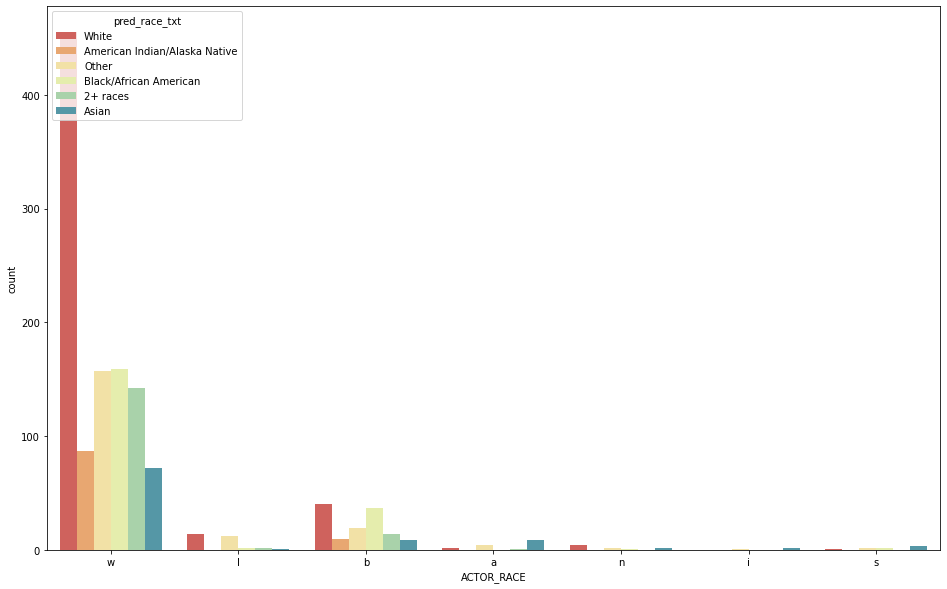

In [83]:
plt.figure(figsize=(16, 10))

sns.countplot(data=df2, x='ACTOR_RACE', hue='pred_race_txt', palette='Spectral')

plt.show()

In [88]:
df2[df2.ACTOR_RACE == 'n']

,nconst,primaryName,first_name,last_name,__name,pred_race,pred_race_txt,ACTOR_NAME,ACTOR_RACE,PART_WHITE
325,nm0000719,F. Murray Abraham,F.,Abraham,Abraham F.,O,Other,F. Murray Abraham,n,y
435,nm0001416,Catherine Keener,Catherine,Keener,Keener Catherine,W,White,Catherine Keener,n,y
504,nm0001724,Tony Shalhoub,Tony,Shalhoub,Shalhoub Tony,B,Black/African American,Tony Shalhoub,n,n
550,nm0002436,Shannon Elizabeth,Shannon,Elizabeth,Elizabeth Shannon,W,White,Shannon Elizabeth,n,y
1062,nm0846548,Saïd Taghmaoui,Saïd,Taghmaoui,Taghmaoui Saïd,O,Other,Said Taghmaoui,n,n
1072,nm0869467,Shaun Toub,Shaun,Toub,Toub Shaun,A,Asian,Shaun Toub,n,n
1129,nm0957909,Ayelet Zurer,Ayelet,Zurer,Zurer Ayelet,W,White,Ayelet Zurer,n,n
1216,nm1896736,Haaz Sleiman,Haaz,Sleiman,Sleiman Haaz,W,White,Haaz Sleiman,n,n
1235,nm2415554,Mohamed Akhzam,Mohamed,Akhzam,Akhzam Mohamed,A,Asian,Mohamed Akhzam,n,n


In [91]:
df2[df2.pred_race_txt == 'Other'].ACTOR_RACE.value_counts()

w    157
b     19
l     12
a      4
n      2
s      2
i      1
Name: ACTOR_RACE, dtype: int64